In [ ]:
import pandas as pd 
sa = pd.read_csv('/content/drive/MyDrive/HG/SA/sa_preprocessed.csv') #미리 토큰화한 감성 문서 활용

## 감성문서 텍스트 추가 전처리

In [ ]:
sa.drop(columns = ["Unnamed: 0"], inplace=True)

In [ ]:
sa['Label'].unique()

array(['Happiness', 'Surprise', 'Neutral', 'Fear', 'Disgust', 'Angry',
       'Sadness'], dtype=object)

In [ ]:
# Happiness 는 1, Fear, Disgust, Angry, Sadness는 0, 나머지는 제거
sa = sa[sa.Label != 'Surprise']
sa = sa[sa.Label != 'Neutral'] # 총 73868행

In [ ]:
sa['bi_sent'] = 0 

In [ ]:
sa['bi_sent'][(sa['Label'] == 'Happiness')] = 1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sa[(sa['bi_sent']==1)] # 17792
sa[(sa['bi_sent']==0)] # 56076 ~ 약 3배 차이

,Text,Label,text_clean,text_tokenized,text_tokenized_2,bi_sent
132,혼자는 무서우니까 친구랑 같이 보내주세요,Fear,혼자 무섭다 친구 보내다,"['혼자', '무섭다', '친구', '보내다']","['무섭다', '친구', '보내다']",0
133,무서워서 혼자는 도저히 못갈거 같아요,Fear,무섭다 혼자 도저히 갈다 같다,"['무섭다', '혼자', '도저히', '갈다', '같다']","['무섭다', '도저히', '갈다']",0
134,트라우마 생길걸 같으니 제발 친구랑 보내주세요,Fear,트라우마 생기다 걸 같다 제발 친구 보내다,"['트라우마', '생기다', '걸', '같다', '제발', '친구', '보내다']","['트라우마', '생기다', '걸', '제발', '친구', '보내다']",0
135,손에 든거 내려놓으세요,Fear,손 들다 내려놓다,"['손', '들다', '내려놓다']","['손', '들다', '내려놓다']",0
136,거기 멈추세요 누구시죠,Fear,거기 멈추다 누구 시,"['거기', '멈추다', '누구', '시']","['거기', '멈추다', '시']",0
...,...,...,...,...,...,...
122124,기자는 사람들이 좋아하는 걸 보도하는 직업이 아니라고 기자의 정체성을 잃을 셈이야?,Angry,기자 사람 좋아하다 걸 보도 하다 직업 아니다 기자 정체 잃다 셈,"['기자', '사람', '좋아하다', '걸', '보도', '하다', '직업', '아...","['기자', '사람', '좋아하다', '걸', '보도', '직업', '아니다', '...",0
122125,기자의 정체성이 무슨 소용이야 다 쓸모 없어 부질없어 알아주지도 않잖아,Sadness,기자 정체 무슨 소용 쓸모 없다 부질없다 알아주다 않다,"['기자', '정체', '무슨', '소용', '쓸모', '없다', '부질없다', '...","['기자', '정체', '소용', '쓸모', '부질없다', '알아주다', '않다']",0
122126,이러다가 가짜 뉴스인 거 들키기라도 하면 너는 그대로 모가지야,Angry,가짜 뉴스 거 들키다 기 하다 너 그대로 모가지,"['가짜', '뉴스', '거', '들키다', '기', '하다', '너', '그대로'...","['가짜', '뉴스', '들키다', '그대로', '모가지']",0
122127,누가 들킨대? 너만 입 다물고 있으면 세상 사람들 아무도 몰라,Angry,누가 들키다 너 입 다물다 있다 세상 사람 아무 모르다,"['누가', '들키다', '너', '입', '다물다', '있다', '세상', '사람...","['누가', '들키다', '입', '다물다', '세상', '사람', '아무', '모...",0


In [ ]:
ssa = sa[['text_tokenized_2','bi_sent']]

In [ ]:
X = ssa['text_tokenized_2']
y = ssa['bi_sent']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
ssa

,text_tokenized_2,bi_sent
0,"['정말', '취향', '역시', '남친']",1
1,"['비싸다', '고맙다']",1
2,"['갖다', '건지다', '정말', '센스']",1
3,"['이제', '재수', '생활', '끝']",1
4,"['엄마', '이제', '어깨', '펴다', '다니다', '붙다']",1
...,...,...
122124,"['기자', '사람', '좋아하다', '걸', '보도', '직업', '아니다', '...",0
122125,"['기자', '정체', '소용', '쓸모', '부질없다', '알아주다', '않다']",0
122126,"['가짜', '뉴스', '들키다', '그대로', '모가지']",0
122127,"['누가', '들키다', '입', '다물다', '세상', '사람', '아무', '모...",0


In [ ]:
train_data, test_data = train_test_split(ssa, test_size = 0.1, shuffle=True,  random_state = 42)

In [ ]:
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 66481
테스트용 리뷰의 개수 : 7387


In [ ]:
print(train_data.groupby('bi_sent').size().reset_index(name = 'count'))

   bi_sent  count
0        0  50495
1        1  15986


In [ ]:
train_data

,text_tokenized_2,bi_sent
88203,"['어머', '귀엽다', '장난', '많다', '나이']",1
77977,"['어우', '더럽다', '얼른', '치우다']",0
54331,"['다시', '만날']",0
3939,"['모르다', '사람', '빌리다', '달라', '극혐']",0
108044,"['그림', '그리다', '그간', '피로', '싹', '풀리다', '기분']",1
...,...,...
69779,"['마지막', '한번', '정말', '미안하다']",0
6790,"['웹사이트', '만들다', '쓰기', '고맙다']",1
93968,"['당연하다', '나중', '휴가', '나오다', '연락', '밥', '사주다']",1
1211,"['생애', '다시', '만나다']",0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 네이버 쇼핑 리뷰 감성분석하기 참고: https://wikidocs.net/94600

긍정 리뷰의 평균 길이 : 30.64856749655949
부정 리뷰의 평균 길이 : 33.280285176750176


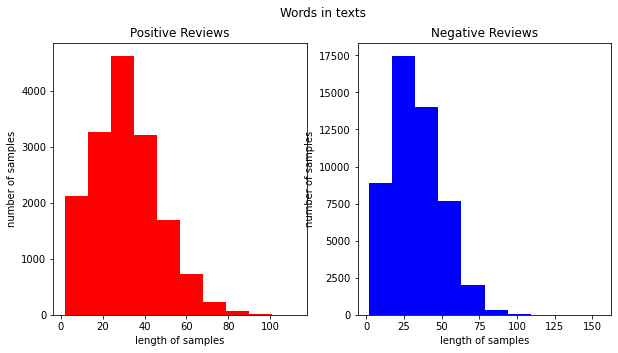

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['bi_sent']==1]['text_tokenized_2'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['bi_sent']==0]['text_tokenized_2'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
import gensim
from gensim.models import Word2Vec, FastText

model = Word2Vec(aa, min_count=1, size=300)

In [ ]:
train_data = train_data.reset_index()
train_data = train_data.drop(columns = ["index"])

In [ ]:
train_data

,text_tokenized_2,bi_sent
0,"['어머', '귀엽다', '장난', '많다', '나이']",1
1,"['어우', '더럽다', '얼른', '치우다']",0
2,"['다시', '만날']",0
3,"['모르다', '사람', '빌리다', '달라', '극혐']",0
4,"['그림', '그리다', '그간', '피로', '싹', '풀리다', '기분']",1
...,...,...
66476,"['마지막', '한번', '정말', '미안하다']",0
66477,"['웹사이트', '만들다', '쓰기', '고맙다']",1
66478,"['당연하다', '나중', '휴가', '나오다', '연락', '밥', '사주다']",1
66479,"['생애', '다시', '만나다']",0


In [ ]:
a= train_data['text_tokenized_2']

In [ ]:
a

0                      ['어머', '귀엽다', '장난', '많다', '나이']
1                           ['어우', '더럽다', '얼른', '치우다']
2                                         ['다시', '만날']
3                     ['모르다', '사람', '빌리다', '달라', '극혐']
4          ['그림', '그리다', '그간', '피로', '싹', '풀리다', '기분']
                             ...                      
66476                      ['마지막', '한번', '정말', '미안하다']
66477                     ['웹사이트', '만들다', '쓰기', '고맙다']
66478    ['당연하다', '나중', '휴가', '나오다', '연락', '밥', '사주다']
66479                              ['생애', '다시', '만나다']
66480                                           ['엄마']
Name: text_tokenized_2, Length: 66481, dtype: object

In [ ]:
ssaa = []
for i in range(len(a)):
  ssaa.append(eval(a[i]))

### 홈가드닝 텍스트 추가

In [ ]:
df = pd.read_csv('tc_v3.csv')
a = df['text_tokenized_3']

aa = []
for i in range(len(a)):
  aa.append(eval(a[i]))

In [ ]:
ssa = ssaa + aa 

In [ ]:
vocab_size = len(model.wv.vocab) #15929개

In [ ]:
X_train = train_data['text_tokenized_2']
y_train = train_data['bi_sent']
X_test = test_data['text_tokenized_2']
y_test = test_data['bi_sent']

## 정수인코딩

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(ssa)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29251
등장 빈도가 1번 이하인 희귀 단어의 수: 10572
단어 집합에서 희귀 단어의 비율: 36.142354107551874
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.784286378773525


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 18681


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(ssa)
ssa_int = tokenizer.texts_to_sequences(ssa)

In [ ]:
len(ssaa) #66481
#len(aa) #55197

66481

In [ ]:
X_test = test_data['text_tokenized_2']

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(ssa_int[:3])

[[524, 282, 166, 42, 307], [542, 87, 118, 163], [75, 804]]


## 패딩

리뷰의 최대 길이 : 179
리뷰의 평균 길이 : 11.078231068886733


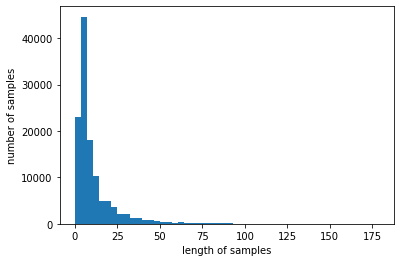

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in ssa_int))
print('리뷰의 평균 길이 :',sum(map(len, ssa_int))/len(ssa_int))
plt.hist([len(s) for s in ssa_int], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 100
below_threshold_len(max_len, ssa_int)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 99.9375400647611


In [ ]:
ssa_int_pad = pad_sequences(ssa_int, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

## GRU 기반 딥러닝을 활용한 감성분류 모델 훈련 및 평가

In [ ]:
import keras

In [ ]:
from keras.layers import Embedding, Dense, GRU
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
X_train = ssa_int_pad[:66481]

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=es, batch_size=60, validation_split=0.2)

#callbacks=[es, mc],

Epoch 1/15
887/887 [==============================] - 135s 150ms/step - loss: 0.2037 - acc: 0.9220 - val_loss: 0.2680 - val_acc: 0.8925
Epoch 2/15
887/887 [==============================] - 132s 149ms/step - loss: 0.1932 - acc: 0.9255 - val_loss: 0.2701 - val_acc: 0.8913
Epoch 3/15
887/887 [==============================] - 133s 149ms/step - loss: 0.1825 - acc: 0.9293 - val_loss: 0.2822 - val_acc: 0.8868
Epoch 4/15
887/887 [==============================] - 132s 149ms/step - loss: 0.1741 - acc: 0.9329 - val_loss: 0.2863 - val_acc: 0.8926
Epoch 5/15
887/887 [==============================] - 132s 148ms/step - loss: 0.1661 - acc: 0.9355 - val_loss: 0.2880 - val_acc: 0.8861
Epoch 00005: early stopping


In [ ]:
#loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

231/231 [==============================] - 5s 22ms/step - loss: 0.5661 - acc: 0.7555

 테스트 정확도: 0.7555


### 홈가드닝 텍스트 감성 예측

In [ ]:
def sentiment_predict(new_sentence):
  100-len()
  score = float(model.predict(new_sentence)) # 예측

  return score
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
X_predict = ssa_int_pad[66481:]

In [ ]:
sent =[]
num=0
for i in range(len(X_predict)):
  print(num,'번째')
  n = 100 - len(aa[i])
  score = np.mean(model.predict(X_predict[i])[n:])
  sent.append(score)
  num=num+1
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100)) 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
61.91% 확률로 긍정 리뷰입니다.
318 번째
61.63% 확률로 긍정 리뷰입니다.
319 번째
61.10% 확률로 긍정 리뷰입니다.
320 번째
55.36% 확률로 긍정 리뷰입니다.
321 번째
60.97% 확률로 긍정 리뷰입니다.
322 번째
54.37% 확률로 긍정 리뷰입니다.
323 번째
70.34% 확률로 긍정 리뷰입니다.
324 번째
62.45% 확률로 긍정 리뷰입니다.
325 번째
62.92% 확률로 긍정 리뷰입니다.
326 번째
61.09% 확률로 긍정 리뷰입니다.
327 번째
57.56% 확률로 긍정 리뷰입니다.
328 번째
59.05% 확률로 긍정 리뷰입니다.
329 번째
63.82% 확률로 긍정 리뷰입니다.
330 번째
63.07% 확률로 긍정 리뷰입니다.
331 번째
73.03% 확률로 긍정 리뷰입니다.
332 번째
61.12% 확률로 긍정 리뷰입니다.
333 번째
57.94% 확률로 긍정 리뷰입니다.
334 번째
54.89% 확률로 긍정 리뷰입니다.
335 번째
55.70% 확률로 긍정 리뷰입니다.
336 번째
59.87% 확률로 긍정 리뷰입니다.
337 번째
61.26% 확률로 긍정 리뷰입니다.
338 번째
62.29% 확률로 긍정 리뷰입니다.
339 번째
61.81% 확률로 긍정 리뷰입니다.
340 번째
61.08% 확률로 긍정 리뷰입니다.
341 번째
60.22% 확률로 부정 리뷰입니다.
342 번째
63.97% 확률로 긍정 리뷰입니다.
343 번째
50.75% 확률로 부정 리뷰입니다.
344 번째
60.38% 확률로 긍정 리뷰입니다.
345 번째
72.89% 확률로 긍정 리뷰입니다.
346 번째
66.09% 확률로 긍정 리뷰입니다.
347 번째
57.03% 확률로 긍정 리뷰입니다.
348 번째
58.53% 확률로 긍정 리뷰입니다.
349 번째
53.86% 확률로 긍정 리뷰입니다.
350 번째
60.29% 확률로 긍정 리뷰입니다.
351 번째
55.37% 확률로 긍

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
52697 번째
54.94% 확률로 긍정 리뷰입니다.
52698 번째
79.07% 확률로 긍정 리뷰입니다.
52699 번째
53.63% 확률로 긍정 리뷰입니다.
52700 번째
59.52% 확률로 긍정 리뷰입니다.
52701 번째
54.59% 확률로 긍정 리뷰입니다.
52702 번째
58.60% 확률로 긍정 리뷰입니다.
52703 번째
62.25% 확률로 긍정 리뷰입니다.
52704 번째
62.60% 확률로 긍정 리뷰입니다.
52705 번째
63.57% 확률로 긍정 리뷰입니다.
52706 번째
67.41% 확률로 긍정 리뷰입니다.
52707 번째
60.05% 확률로 긍정 리뷰입니다.
52708 번째
65.67% 확률로 긍정 리뷰입니다.
52709 번째
57.71% 확률로 긍정 리뷰입니다.
52710 번째
55.87% 확률로 부정 리뷰입니다.
52711 번째
55.59% 확률로 긍정 리뷰입니다.
52712 번째
62.97% 확률로 긍정 리뷰입니다.
52713 번째
58.28% 확률로 긍정 리뷰입니다.
52714 번째
58.78% 확률로 긍정 리뷰입니다.
52715 번째
56.82% 확률로 긍정 리뷰입니다.
52716 번째
58.79% 확률로 긍정 리뷰입니다.
52717 번째
57.03% 확률로 긍정 리뷰입니다.
52718 번째
64.09% 확률로 긍정 리뷰입니다.
52719 번째
65.46% 확률로 긍정 리뷰입니다.
52720 번째
65.68% 확률로 긍정 리뷰입니다.
52721 번째
62.76% 확률로 긍정 리뷰입니다.
52722 번째
58.82% 확률로 긍정 리뷰입니다.
52723 번째
52.34% 확률로 긍정 리뷰입니다.
52724 번째
60.45% 확률로 긍정 리뷰입니다.
52725 번째
54.30% 확률로 긍정 리뷰입니다.
52726 번째
70.34% 확률로 긍정 리뷰입니다.
52727 번째
58.21% 확률로 긍정 리뷰입니다.
52728 번째
60.28% 확률로 긍정 리뷰입니다.
5272

In [ ]:
df['sentiment'] = sent
df.to_csv('sentiment.csv',encoding='utf-8')

In [ ]:
df['text_tokenized_3'][(df['sentiment']<0.4)].index

Int64Index([  341,   361,   663,   781,   856,  1032,  1106,  1346,  1358,
             1417,
            ...
            53756, 54463, 54484, 54496, 54615, 54761, 54850, 54878, 54944,
            55000],
           dtype='int64', length=342)

In [ ]:
df.iloc[53756] # 부정 게시물 row 예시 

Unnamed: 0                                                      54361
text                제 만세선인장 팔들이 떨어져나갔어요 ㅠ  \n하나 떨어지더니 오늘 두개째 떨어졌네요...
text_clean          제 만세선인장 팔들이 떨어져나갔어요 ㅠ  하나 떨어지더니 오늘 두개째 떨어졌네요 ㅠ...
text_sep            제 만세선인 장 팔들이 떨어져 나갔어요 ㅠ 하나 떨어지더니 오늘 두 개째 떨어졌네요...
text_p              제 만세 선인 장 팔들이 떨어져 나갔어요 ㅠ 하나 떨어지더니 오늘 두 개째 떨어졌네...
text_tokenized      제 만세 선인 장 팔 떨어지다 나가다 하나 떨어지다 오늘 두 개 떨어지다 왜 그렇다...
text_tokenized_2    ['제', '만세', '선인', '장', '팔', '떨어지다', '나가다', '하나...
text_tokenized_3    ['만세', '선인', '장', '떨어지다', '나가다', '떨어지다', '오늘',...
text_noun                      ['만세', '선인', '장', '오늘', '담', '몸', '통']
sentiment                                                    0.372104
Name: 53756, dtype: object